# Преобразование Фурье

### Подключение необходимых библиотек.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Создания начального набора данных для дискретного преобразования Фурье.

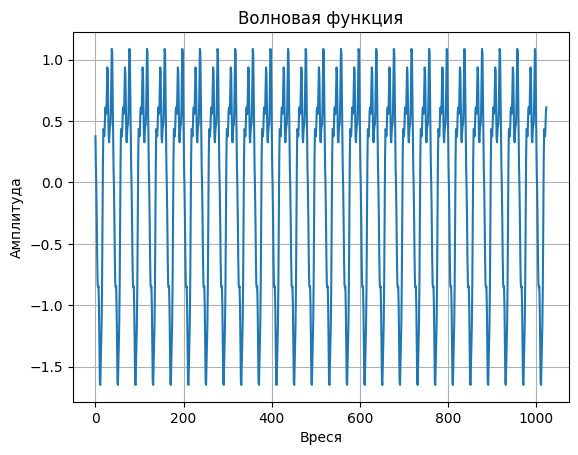

In [2]:
class Sine:
    def __init__(self, frequency, magnitude, phase):
        self.frequency = frequency
        self.magnitude = magnitude
        self.phase = phase

sines = [
    Sine(0.5, 1, 1),
    Sine(1, 0.5, 0.5),
    Sine(2, 0.25, 1),
    Sine(4, 0.125, 1.5),
]

data = []

for i in range(1024):
    i /= 10
    sample = 0
    for sine in sines:
        sample += sine.magnitude * np.sin(np.pi * (i * sine.frequency + sine.phase))

    data.append(sample)

data = np.array(data)

plt.plot(data)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Волновая функция')
plt.grid(True)
plt.show()

### Функции DFT и FFT.

In [3]:
def is_power_of_two(n: int):
    return (n & (n-1) == 0) and n != 0

def dft(block: np.array):
    size = block.shape[0]
    
    indexes = np.arange(size)
    indexes_two_dim = indexes.reshape((size, 1))
    
    constant = -2j * np.pi / size
    exp_mat = np.exp(constant * indexes * indexes_two_dim)
    
    return np.dot(block, exp_mat)

def fft(block: np.array):
    size = block.shape[0]
    
    if not is_power_of_two(size):
        raise Exception("Block size must be power of 2")
    if size <= 64:
        return dft(block)
    
    block_even = fft(block[::2])
    block_odd = fft(block[1::2])
    constant = -2j * np.pi / size
    factor = np.exp(constant * np.arange(size))

    return np.concatenate([block_even + factor[:size // 2] * block_odd,  # Комбинирование результатов
                           block_even + factor[size // 2:] * block_odd])
            

### Получение и изображение результата преобразований Фурье.

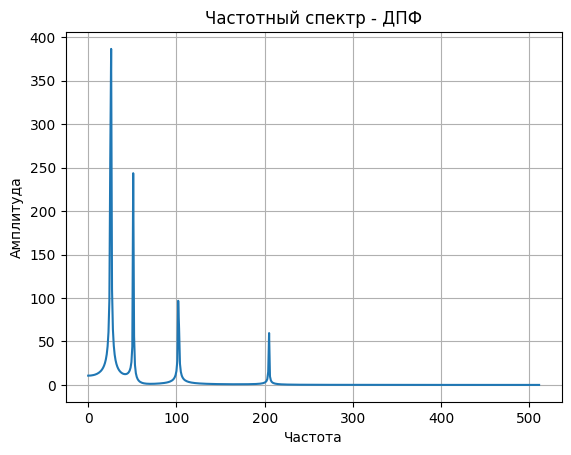

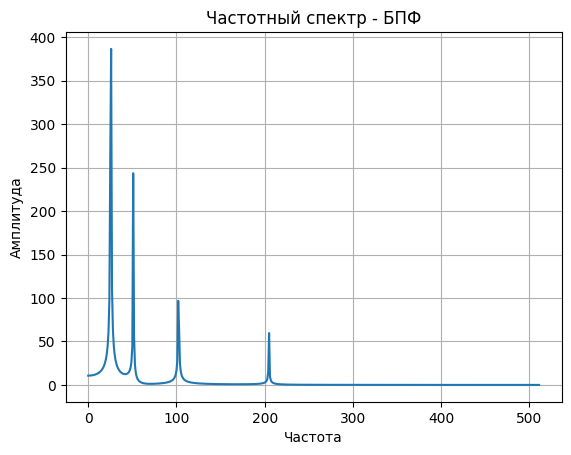

In [4]:
#fig, (ax0, ax1) = plt.subplots(2)
res_dft = np.abs(dft(data))
res_dft = res_dft[0:(res_dft.shape[0] // 2)]
plt.plot(res_dft)  # Вычисление БПФ и построение графика амплитудного спектра
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Частотный спектр - ДПФ')
plt.grid(True)
plt.show()

res_fft = np.abs(dft(data))
res_fft= res_fft[0:(res_fft.shape[0] // 2)]
plt.plot(res_fft)  # Вычисление БПФ и построение графика амплитудного спектра
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Частотный спектр - БПФ')
plt.grid(True)
plt.show()  